<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [72]:
warnings.filterwarnings('ignore')

#### Load 'german_credit_data.csv' and store it in a dataframe

In [73]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [74]:
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [75]:
df.shape

(1000, 11)

#### Columns

In [76]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [77]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [78]:
df['Saving accounts'].fillna('Unknown',inplace=True)
df['Checking account'].fillna('Unknown',inplace=True)
df

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own         Unknown           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little          Unknown   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little          Unknown   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little          Unknown   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0             1169         6             radio/TV  good  
1             5951        48             radio/TV   bad  
2             2096        12            education  good  
3             7882        42  furniture/equipment  good  
4             4870        24                  car   bad  
..             ...       ...                  ...   ...  
995           1736        12  furniture/equipment  good  
996           3857        30                  car  good  
997            804        12             radio/TV  good  
998           1845        45             radio/TV   bad  
999           4576        45                  car  good  

[1000 rows x 11 columns]

#### Unique elements in each column

In [79]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [80]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Unnamed: 0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

##### Create a New column Id by replacing unnamed column

In [81]:
df['id']=df['Unnamed: 0']
df.drop(columns=['Unnamed: 0'],inplace=True)

In [82]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own         Unknown           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little          Unknown           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  id  
0         6             radio/TV  good   0  
1        48             radio/TV   bad   1  
2        12            education  good   2  
3        42  furniture/equipment  good   3  
4        24                  car   bad   4

#### Find the information of the dataset


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  id                1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [84]:
df.describe()

Age          Job  Credit amount     Duration           id
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000   499.500000
std      11.375469     0.653614    2822.736876    12.058814   288.819436
min      19.000000     0.000000     250.000000     4.000000     0.000000
25%      27.000000     2.000000    1365.500000    12.000000   249.750000
50%      33.000000     2.000000    2319.500000    18.000000   499.500000
75%      42.000000     2.000000    3972.250000    24.000000   749.250000
max      75.000000     3.000000   18424.000000    72.000000   999.000000

#### Fetch the following groupby results

In [85]:
df.groupby(['Sex','Risk','Purpose']).size()

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [86]:
df.groupby(['Sex','Risk','Purpose'][::-1]).size()

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

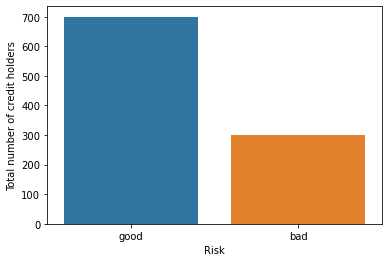

In [87]:
sns.countplot(data=df,x='Risk')
plt.ylabel('Total number of credit holders')
plt.show()

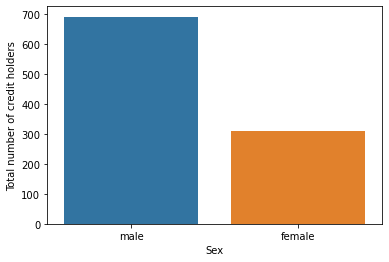

In [88]:
sns.countplot(data=df,x='Sex')
plt.ylabel('Total number of credit holders')
plt.show()

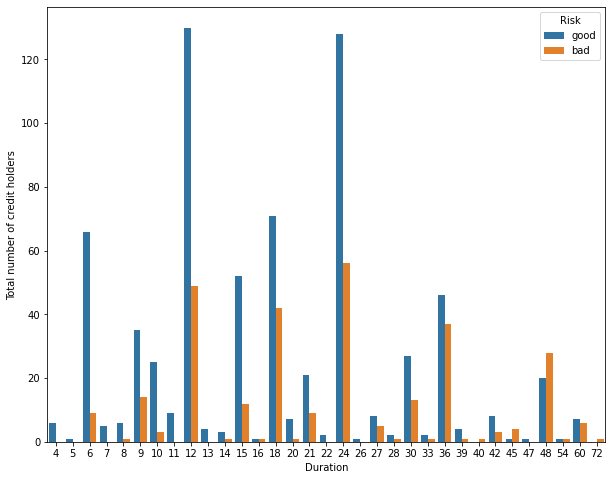

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Duration',hue='Risk')
plt.ylabel('Total number of credit holders')
plt.show()

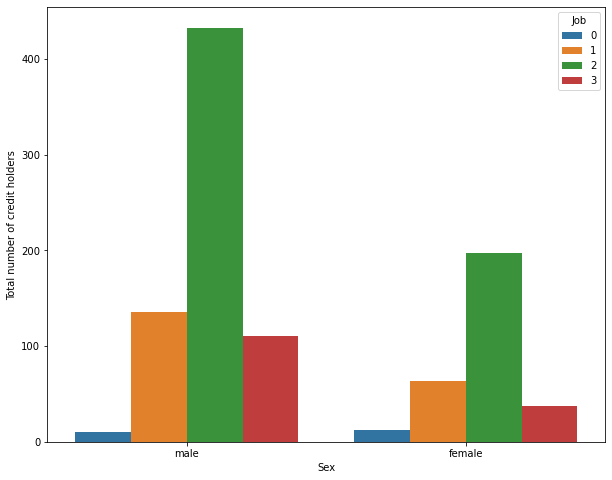

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Sex',hue='Job')
plt.ylabel('Total number of credit holders')
plt.show()

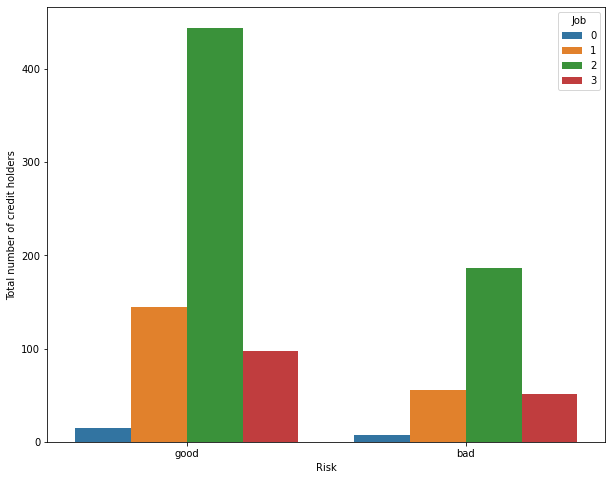

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Risk',hue='Job')
plt.ylabel('Total number of credit holders')
plt.show()

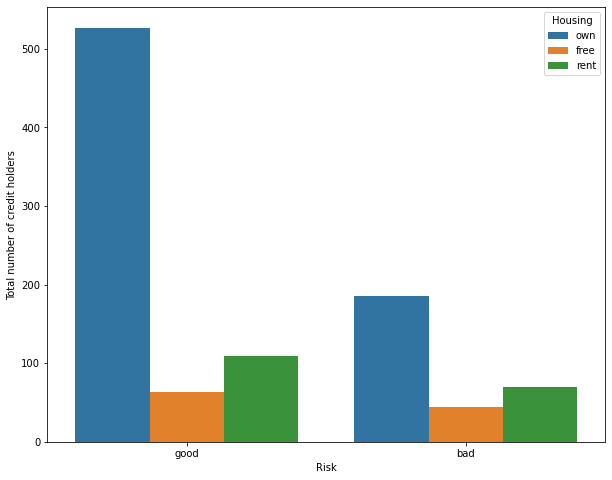

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Risk',hue='Housing')
plt.ylabel('Total number of credit holders')
plt.show()

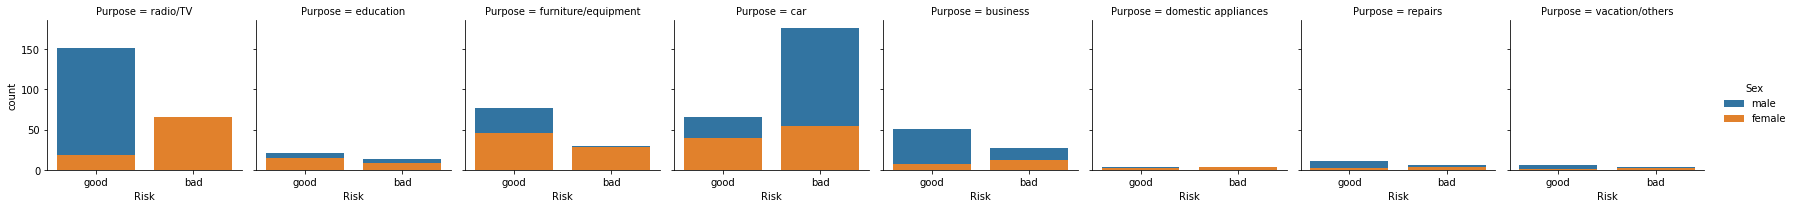

In [93]:

g=sns.FacetGrid(data=df,col='Purpose',hue='Sex')
g.map_dataframe(sns.countplot,"Risk")
g.add_legend()
plt.show()


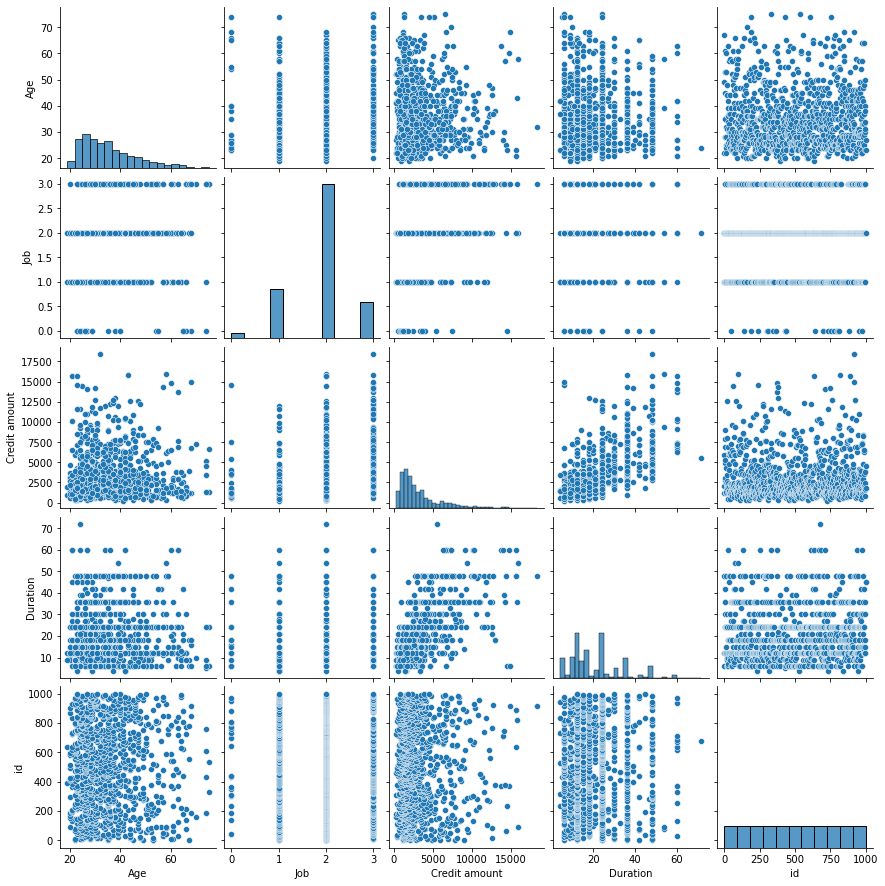

In [94]:
sns.pairplot(df)
plt.show()

In [95]:
df.drop(columns=['Job','id'],inplace=True)
df.head()

Age     Sex Housing Saving accounts Checking account  Credit amount  \
0   67    male     own         Unknown           little           1169   
1   22  female     own          little         moderate           5951   
2   49    male     own          little          Unknown           2096   
3   45    male    free          little           little           7882   
4   53    male    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [96]:
def gen(x):
    if x=='male':
        return 0
    elif x=='female':
        return 1
df['sex']=df['Sex'].apply(gen)
df.drop(columns=['Sex'],inplace=True)

df.head()

Age Housing Saving accounts Checking account  Credit amount  Duration  \
0   67     own         Unknown           little           1169         6   
1   22     own          little         moderate           5951        48   
2   49     own          little          Unknown           2096        12   
3   45    free          little           little           7882        42   
4   53    free          little           little           4870        24   

               Purpose  Risk  sex  
0             radio/TV  good    0  
1             radio/TV   bad    1  
2            education  good    0  
3  furniture/equipment  good    0  
4                  car   bad    0

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [97]:
pd.set_option("display.max_columns",None)
ndf=pd.get_dummies(df['Purpose'],drop_first=True)
ndf.head()
X=df.drop(columns=['Purpose'])
y=df['Purpose']
X.head()

Age Housing Saving accounts Checking account  Credit amount  Duration  \
0   67     own         Unknown           little           1169         6   
1   22     own          little         moderate           5951        48   
2   49     own          little          Unknown           2096        12   
3   45    free          little           little           7882        42   
4   53    free          little           little           4870        24   

   Risk  sex  
0  good    0  
1   bad    1  
2  good    0  
3  good    0  
4   bad    0

In [98]:
frames=[df,ndf]
new_df=pd.concat(frames,axis=1)
new_df.tail()

Age Housing Saving accounts Checking account  Credit amount  Duration  \
995   31     own          little          Unknown           1736        12   
996   40     own          little           little           3857        30   
997   38     own          little          Unknown            804        12   
998   23    free          little           little           1845        45   
999   27     own        moderate         moderate           4576        45   

                 Purpose  Risk  sex  car  domestic appliances  education  \
995  furniture/equipment  good    1    0                    0          0   
996                  car  good    0    1                    0          0   
997             radio/TV  good    0    0                    0          0   
998             radio/TV   bad    0    0                    0          0   
999                  car  good    0    1                    0          0   

     furniture/equipment  radio/TV  repairs  vacation/others  
995                    1         0        0                0  
996                    0         0        0                0  
997                    0         1        0                0  
998                    0         1        0                0  
999                    0         0        0                0

#### Use label encoding for rest of the categorical data

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le
X.head()

Age Housing Saving accounts Checking account  Credit amount  Duration  \
0   67     own         Unknown           little           1169         6   
1   22     own          little         moderate           5951        48   
2   49     own          little          Unknown           2096        12   
3   45    free          little           little           7882        42   
4   53    free          little           little           4870        24   

   Risk  sex  
0  good    0  
1   bad    1  
2  good    0  
3  good    0  
4   bad    0

In [100]:
X.dtypes

Age                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Risk                object
sex                  int64
dtype: object

In [101]:
df['housing']=le.fit_transform(df['Housing'])
df['Saving accounts']=le.fit_transform(df['Saving accounts'])
df['checking account']=le.fit_transform(df['Checking account'])
df['risk']=le.fit_transform(df['Risk'])
df.drop(columns=['Housing','Saving accounts','Checking account','Risk'],inplace=True)
df.head()

Age  Credit amount  Duration              Purpose  sex  housing  \
0   67           1169         6             radio/TV    0        1   
1   22           5951        48             radio/TV    1        1   
2   49           2096        12            education    0        1   
3   45           7882        42  furniture/equipment    0        0   
4   53           4870        24                  car    0        0   

   checking account  risk  
0                 1     1  
1                 2     0  
2                 0     1  
3                 1     1  
4                 1     0

### Check the unique values in the new dataframe

In [102]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Age
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Credit amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  86

### Plot heatmap

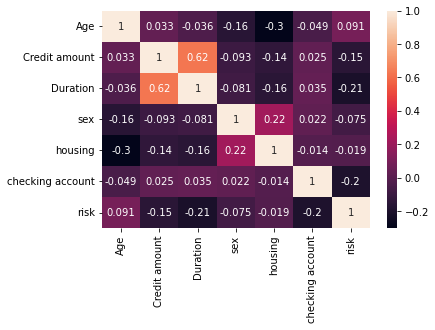

In [103]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [104]:
df2=pd.get_dummies(df['Purpose'],drop_first=True)
new_df=pd.concat([df,df2],axis=1)
new_df.drop(columns=['Purpose'],inplace=True)
new_df.head()

Age  Credit amount  Duration  sex  housing  checking account  risk  car  \
0   67           1169         6    0        1                 1     1    0   
1   22           5951        48    1        1                 2     0    0   
2   49           2096        12    0        1                 0     1    0   
3   45           7882        42    0        0                 1     1    0   
4   53           4870        24    0        0                 1     0    1   

   domestic appliances  education  furniture/equipment  radio/TV  repairs  \
0                    0          0                    0         1        0   
1                    0          0                    0         1        0   
2                    0          1                    0         0        0   
3                    0          0                    1         0        0   
4                    0          0                    0         0        0   

   vacation/others  
0                0  
1                0  
2                0  
3                0  
4                0

In [105]:
new_df['housing'].unique()

array([1, 0, 2])

### Select the Dependent(target) and Independent Variables:

In [106]:
X=new_df.drop(columns=['risk'])
y=new_df['risk']
X.shape

(1000, 13)

In [107]:
y.shape

(1000,)

In [108]:
X.head()

Age  Credit amount  Duration  sex  housing  checking account  car  \
0   67           1169         6    0        1                 1    0   
1   22           5951        48    1        1                 2    0   
2   49           2096        12    0        1                 0    0   
3   45           7882        42    0        0                 1    0   
4   53           4870        24    0        0                 1    1   

   domestic appliances  education  furniture/equipment  radio/TV  repairs  \
0                    0          0                    0         1        0   
1                    0          0                    0         1        0   
2                    0          1                    0         0        0   
3                    0          0                    1         0        0   
4                    0          0                    0         0        0   

   vacation/others  
0                0  
1                0  
2                0  
3                0  
4                0

# Standardize the data

In [109]:
X.dtypes

Age                    int64
Credit amount          int64
Duration               int64
sex                    int64
housing                int32
checking account       int32
car                    uint8
domestic appliances    uint8
education              uint8
furniture/equipment    uint8
radio/TV               uint8
repairs                uint8
vacation/others        uint8
dtype: object

In [110]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X.head()

Age  Credit amount  Duration       sex   housing  checking account  \
0  2.766456      -0.745131 -1.236478 -0.670280 -0.133710         -0.001045   
1 -1.191404       0.949817  2.248194  1.491914 -0.133710          1.044372   
2  1.183312      -0.416562 -0.738668 -0.670280 -0.133710         -1.046463   
3  0.831502       1.634247  1.750384 -0.670280 -2.016956         -0.001045   
4  1.535122       0.566664  0.256953 -0.670280 -2.016956         -0.001045   

        car  domestic appliances  education  furniture/equipment  radio/TV  \
0 -0.712949            -0.110208  -0.250398            -0.470108  1.603567   
1 -0.712949            -0.110208  -0.250398            -0.470108  1.603567   
2 -0.712949            -0.110208   3.993639            -0.470108 -0.623610   
3 -0.712949            -0.110208  -0.250398             2.127172 -0.623610   
4  1.402626            -0.110208  -0.250398            -0.470108 -0.623610   

    repairs  vacation/others  
0 -0.149983        -0.110208  
1 -0.149983        -0.110208  
2 -0.149983        -0.110208  
3 -0.149983        -0.110208  
4 -0.149983        -0.110208

# Split the data into training and testing set

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 100)


# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [112]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [113]:
cross_val_score(RandomForestClassifier(),X,y,cv=5,scoring='accuracy').mean()

0.7229999999999999

In [44]:
param={'n_estimators':list(range(1,50)),'criterion':['gini','entropy'],'max_depth':[None,1,2,3]}
gv=GridSearchCV(RandomForestClassifier(),param,cv=3,scoring='accuracy')
gv

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [45]:
gv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [46]:
gv.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 19}

In [47]:
rpred=gv.predict(X_test)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [48]:
metrics.accuracy_score(y_test,rpred)

0.685

#### Visualize the confusion matrix

In [49]:
print('Confusion matrix of the model is:')
print(metrics.confusion_matrix(y_test,rpred))
print('Classification report of the model is:')
print(metrics.classification_report(y_test,rpred))

Confusion matrix of the model is:
[[ 24  32]
 [ 31 113]]
Classification report of the model is:
              precision    recall  f1-score   support

           0       0.44      0.43      0.43        56
           1       0.78      0.78      0.78       144

    accuracy                           0.69       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.68      0.69      0.68       200



## SupportVectorClassifier:

In [50]:
from sklearn.svm import SVC

In [51]:
smodel=SVC()

In [52]:
smodel.fit(X_train,y_train)

SVC()

In [53]:
spred=smodel.predict(X_test)

print('Accuracy score of the model is:')
print(metrics.accuracy_score(y_test,spred))
('Confusion matrix of the model is:')
print(metrics.confusion_matrix(y_test,spred))
print('Classification report of the model is:')
print(metrics.classification_report(y_test,spred))

Accuracy score of the model is:
0.72
[[  7  49]
 [  7 137]]
Classification report of the model is:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        56
           1       0.74      0.95      0.83       144

    accuracy                           0.72       200
   macro avg       0.62      0.54      0.52       200
weighted avg       0.67      0.72      0.65       200



In [54]:
cross_val_score(SVC(),X,y,cv=3,scoring='accuracy').mean()

0.704995414576253

## LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
lmodel=LogisticRegression()
lmodel.fit(X_train,y_train)

lpred=lmodel.predict(X_test)
print('Accuracy score of the model is:')
print(metrics.accuracy_score(y_test,lpred))
('Confusion matrix of the model is:')
print(metrics.confusion_matrix(y_test,lpred))
print('Classification report of the model is:')
print(metrics.classification_report(y_test,lpred))

Accuracy score of the model is:
0.7
[[  7  49]
 [ 11 133]]
Classification report of the model is:
              precision    recall  f1-score   support

           0       0.39      0.12      0.19        56
           1       0.73      0.92      0.82       144

    accuracy                           0.70       200
   macro avg       0.56      0.52      0.50       200
weighted avg       0.64      0.70      0.64       200



In [56]:
cross_val_score(LogisticRegression(),X,y,cv=3,scoring='accuracy').mean()

0.704995414576253

#### View scores of the different models 

In [57]:
data=[['Random classifer',cross_val_score(RandomForestClassifier(),X,y,cv=3,scoring='accuracy').mean(),metrics.accuracy_score(y_test,rpred)],
      ['SVC',cross_val_score(SVC(),X,y,cv=3,scoring='accuracy').mean(),metrics.accuracy_score(y_test,spred)],
      ['Logistic Regression',cross_val_score(LogisticRegression(),X,y,cv=3,scoring='accuracy').mean(),metrics.accuracy_score(y_test,lpred)]]

pd.DataFrame(data,columns=['Model','Cross value Score','Accuracy score'])

Model  Cross value Score  Accuracy score
0     Random classifer           0.728018           0.685
1                  SVC           0.704995           0.720
2  Logistic Regression           0.704995           0.700

## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [58]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca
X_pca=pca.fit_transform(X)
X=pd.DataFrame(X_pca)
X.head()

0         1
0 -0.597661 -2.557684
1  0.499415  1.899884
2 -0.096567 -1.698926
3  2.308483  1.276906
4  2.323866 -1.597765

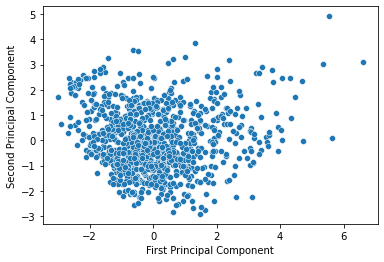

In [59]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [60]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [61]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [62]:
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [63]:
logpred=logisticRegr.predict(X_test)

In [64]:
#Confusion Matrix
from sklearn import metrics
print('Accuracy score')
print(metrics.accuracy_score(y_test,logpred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,logpred))


Accuracy score
0.7
Confusion Matrix
[[  7  49]
 [ 11 133]]


In [65]:
import joblib

In [66]:
joblib.dump(logisticRegr,'Logisticregressionmodel')

['Logisticregressionmodel']

In [67]:
Load_model=joblib.load('Logisticregressionmodel')

In [68]:
Load_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1])

## Model Deployment With Tkinter

### Import Tkinter Library

In [114]:
X.head()

Age  Credit amount  Duration       sex   housing  checking account  \
0  2.766456      -0.745131 -1.236478 -0.670280 -0.133710         -0.001045   
1 -1.191404       0.949817  2.248194  1.491914 -0.133710          1.044372   
2  1.183312      -0.416562 -0.738668 -0.670280 -0.133710         -1.046463   
3  0.831502       1.634247  1.750384 -0.670280 -2.016956         -0.001045   
4  1.535122       0.566664  0.256953 -0.670280 -2.016956         -0.001045   

        car  domestic appliances  education  furniture/equipment  radio/TV  \
0 -0.712949            -0.110208  -0.250398            -0.470108  1.603567   
1 -0.712949            -0.110208  -0.250398            -0.470108  1.603567   
2 -0.712949            -0.110208   3.993639            -0.470108 -0.623610   
3 -0.712949            -0.110208  -0.250398             2.127172 -0.623610   
4  1.402626            -0.110208  -0.250398            -0.470108 -0.623610   

    repairs  vacation/others  
0 -0.149983        -0.110208  
1 -0.149983        -0.110208  
2 -0.149983        -0.110208  
3 -0.149983        -0.110208  
4 -0.149983        -0.110208

In [115]:

X['DomesticAppliances']=X['domestic appliances']
X['furniture_equipment']=X['furniture/equipment']
X['radio_TV']=X['radio/TV']
X['vacation_others']=X['vacation/others']
X.drop(columns=['domestic appliances','furniture/equipment','vacation/others','radio/TV'],inplace=True)
X.head(1)

Age  Credit amount  Duration      sex  housing  checking account  \
0  2.766456      -0.745131 -1.236478 -0.67028 -0.13371         -0.001045   

        car  education   repairs  DomesticAppliances  furniture_equipment  \
0 -0.712949  -0.250398 -0.149983           -0.110208            -0.470108   

   radio_TV  vacation_others  
0  1.603567        -0.110208

In [116]:
from tkinter import *
from tkinter.ttk import Combobox

In [134]:
def getprediction():
    age1=int(age.get())
    sex1=sex.get()
    housing1=housing.get()
    #Savingaccount1=Savingaccount.get()
    Checkingaccount1=Checkingaccount.get()
    Purpose1=Purpose.get()
    Duration1=int(Duration.get())
    Creditamount1=int(Creditamount.get())
    
    resultbox.delete(0, END)
    
    if sex1=='Male':
        sex1=0
    elif sex1=='Female':
        sex1=1
        
    if Checkingaccount1=='little':
        Checkingaccount1=1
    elif Checkingaccount1=='moderate':
        Checkingaccount1=2
    elif Checkingaccount1=='Unknown':
        Checkingaccount1=0
    elif Checkingaccount1=='rich':
        Checkingaccount1=3
        
    if housing1=='Own':
        housing1=1
    elif housing1=='Free':
        housing1=0
    else:
        housing1=2
        
            
        
    if Purpose1=='car':
        car=1
        DomesticAppliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif Purpose1=='domestic appliances':
        car=0
        DomesticAppliances=1
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif Purpose1=='education':
        car=0
        DomesticAppliances=0
        education=1
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif Purpose1=='furniture/equipment':
        car=0
        DomesticAppliances=0
        education=0
        furniture_equipment=1
        radio_TV=0
        repairs=0
        vacation_others=0
    elif Purpose1=='radio/TV':
        car=0
        DomesticAppliances=0
        education=0
        furniture_equipment=0
        radio_TV=1
        repairs=0
        vacation_others=0
    elif Purpose1=='repairs':
        car=0
        DomesticAppliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=1
        vacation_others=0
    else:
        car=1
        DomesticAppliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=1

        
    result=lmodel.predict(scalar.transform([[age1,sex1,housing1,car,Checkingaccount1,DomesticAppliances,education,furniture_equipment,radio_TV,repairs,vacation_others,Duration1,Creditamount1]]))
    if result[0] == 1:
        resultbox.insert(0, 'Good')
    elif result[0] == 0:
        resultbox.insert(0, 'Bad')
    else:
        resultbox.insert(0, 'Error') 

In [136]:
window=Tk()
window.title('Credit Card Analysis')
window.geometry("600x600")
window.resizable(0,0)

sexlabel=Label(window,text='Sex').pack()
sex= Combobox(window)
sex['values']=('Male','Female')
sex.current(0)
sex.pack()

Label(window).pack

agelabel=Label(window,text='Age').pack()
age=Entry(window)
age.pack()

Label(window).pack

housinglabel=Label(window,text='housing').pack()
housing= Combobox(window)
housing['values']=('Own','Free','Rent')
housing.current(0)
housing.pack()

Label(window).pack

#Savingaccountlabel=Label(window,text='SavingAccount').pack()
#Savingaccount= Combobox(window)
#Savingaccount['values']=('Unknown' ,'little' ,'quite rich', 'rich' ,'moderate')
#Savingaccount.current(0)
#Savingaccount.pack()

Label(window).pack


Checkingaccountlabel=Label(window,text='CheckingAccount').pack()
Checkingaccount= Combobox(window)
Checkingaccount['values']=('little', 'moderate', 'Unknown' ,'rich')
Checkingaccount.current(0)
Checkingaccount.pack()

Label(window).pack

Purposelabel=Label(window,text='Purpose').pack()
Purpose= Combobox(window)
Purpose['values']=('car' ,'domestic appliances','education','furniture/equipment','radio/TV','repairs','vacation/others')
Purpose.current(0)
Purpose.pack()

Label(window).pack

Durationlabel=Label(window,text='Duration').pack()
Duration=Entry(window)
Duration.pack()

Label(window).pack

Creditamountlabel=Label(window,text='Credit Amount').pack()
Creditamount=Entry(window)
Creditamount.pack()

Label(window).pack


button=Button(window,text='Risk Prediction',command=getprediction)
button.pack()

resultbox = Entry(window)
resultbox.pack()

window.mainloop()

### Define a function that will return the output of our prediction in an Entry box in tkinter window

### Create Tkinter window and all necessary input and output boxes

***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>